# **Método del polinomio característico**

## **Código y análisis matemático computacional de cada función utilizada**

**Importaciones**

In [2]:
import numpy as np
import sympy as sp

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Calcular el polinomio característico**

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<div align="justify">

**Fundamentación matemática**

1. Construcción de $λ$$I$:

   - Se construye la matriz identidad $I$ de tamaño $n$$x$$n$ y se escala por $λ$.
   - Esto genera $λ$$I$, esto genera una matriz diagonal donde los valores diagonales son $λ$

2. Construcción de $A$-$λ$$I$:

   - Se resta $λ$$I$ de la matriz $A$, obteniendo $A$-$λ$$I$
  
 3. Cálculo del determinante:

   - El polinomio característico es el determinante de $A$-$λ$$I$:

$$p(λ) = det(A-λI)$$


</div>

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<div align="justify">

**Complejidad Computacional**

1. **Construcción de matrices**

$$( \lambda I - A)$$

- La matriz $(λ I - A)$ se obtiene restando la matriz original $A$ de una matriz identidad $I$ escalada por el valor simbólico $\lambda$.

Pasos necesarios:
1. Crear la matriz identidad $I$, que tiene 1 en la diagonal y 0 en las demás entradas. Esto requiere recorrer todas las posiciones de una matriz $( n \times n)$.
2. Multiplicar $\lambda$ por $I$, lo que involucra $n$ operaciones para escalar las $n$ entradas de la diagonal.
3. Restar $A$ de $\lambda I$, lo que requiere recorrer todas las entradas $( n^2)$ operaciones.

**Complejidad total**:
$$O(n^2)$$
  - La complejidad depende del número de entradas de la matriz $( n \times n)$, ya que cada entrada debe calcularse.


2. **Determinante simbólico**

El cálculo del determinante simbólico de la matriz resultante $(λ I - A)$  es uno de los pasos más costosos en este proceso


SymPy utiliza algoritmos más avanzados para calcular el determinante simbólico, como métodos de descomposición LU o de eliminación Gaussiana adaptados a cálculos simbólicos.

- Estos métodos tienen una complejidad aproximada de $O(n^3)$, ya que descomponen la matriz en una forma triangular que simplifica el cálculo del determinante.

**Descomposición LU**:
1. Divide la matriz en dos matrices triangulares (una triangular superior y otra inferior).
2. El determinante se calcula multiplicando los elementos diagonales de estas matrices.

**Eliminación Gaussiana**
1. Transforma la matriz en una forma escalonada (triangular superior).
2. El determinante se calcula multiplicando los elementos de la diagonal de la matriz escalonada.

**Complejidad**:
-  $O(n^3)$: Esto se debe a que ambos métodos implican $n^3$ operaciones para matrices de $n \times n$.


</div>

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [4]:

def calculate_characteristic_polynomial_manual(matrix):
    """
    Calcula el polinomio característico de una matriz sin usar funciones de alto nivel.
    """
    # Dimensión de la matriz
    n = len(matrix)

    # Crear el símbolo lambda
    lambd = sp.symbols('λ')

    # Construir la matriz (A - λI)
    identity_matrix = [[1 if i == j else 0 for j in range(n)] for i in range(n)]
    lambda_matrix = [[lambd * identity_matrix[i][j] for j in range(n)] for i in range(n)]
    char_matrix = [[matrix[i][j] - lambda_matrix[i][j] for j in range(n)] for i in range(n)]

    # Calcular el determinante simbólicamente
    determinant = sp.Matrix(char_matrix).det()
    return determinant


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Calcular valores propios**

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<div align="justify">

**Fundamentación matemática y Complejidad Computacional**

1. Definición de valores propios:

- Los valores propios son la solución de:

$$p(λ) = 0$$

2. Resolución del polinomio:

- Usamos el método algebraico de SymPy para encontrar las raíces exactas del polinomio.

- Resolución Exacta para Polinomios de Grado $n \leq 4$

Para polinomios de grado $n \leq 4$, **`sp.solvers.solve`** utiliza soluciones cerradas basadas en fórmulas algebraicas clásicas:

**Polinomios Lineales $(n = 1)$**:
   - Resolución directa de la forma:
     
     $$ax + b = 0 \implies x = -\frac{b}{a}$$
   - **Complejidad**: $O(1)$.

**Polinomios Cuadráticos $( n = 2)$**:

   - Se utiliza la fórmula cuadrática:
     
     $$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$
     
   - **Complejidad**: $O(1)$.

**Polinomios Cúbicos $( n = 3)$**:

- Usa la fórmula de Cardano, que implica expresiones más complejas que involucran raíces cúbicas:
  
  $$x = \sqrt[3]{-q + \sqrt{q^2 + p^3}} + \sqrt[3]{-q - \sqrt{q^2 + p^3}}$$
  Donde \( p, q \) son funciones de los coeficientes del polinomio.

**Polinomios Cuárticos $( n = 4)$**:

- Utiliza la fórmula de Ferrari, que descompone el polinomio en términos de dos ecuaciones cuadráticas auxiliares.


**Métodos Numéricos para $(n > 4)$**:

Para polinomios de grado mayor a 4, **`sp.solvers.solve`** recurre a métodos numéricos o aproximaciones. Los más comunes incluyen:

1. Método de Newton-Raphson:
- Aproxima iterativamente las raíces utilizando:
  
  $$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

- Requiere un buen punto inicial $x_0$.

- **Complejidad**: Depende del número de iteraciones y el grado del polinomio, típicamente $O(n \cdot k)$, donde $k$ es el número de iteraciones necesarias.

2. Método de Durand-Kerner (para todas las raíces simultáneamente):

- Aproxima las raíces de forma iterativa usando un conjunto inicial de conjeturas. Se basa en resolver todas las raíces simultáneamente:
  
  $$x_i^{(k+1)} = x_i^{(k)} - \frac{P(x_i^{(k)})}{\prod_{j \neq i} (x_i^{(k)} - x_j^{(k)})}$$

- Este método es útil para polinomios de grado alto.

- **Complejidad**: Aproximadamente $O(n^2 \cdot k)$, donde $n$ es el grado del polinomio y $k$ es el número de iteraciones.

**Elección de Método por SymPy**

SymPy utiliza un flujo de trabajo híbrido:
1. Intenta resolver analíticamente si $n \leq 4$.
2. Para $n > 4$, selecciona un método numérico apropiado (usualmente Newton-Raphson o Durand-Kerner, dependiendo de la estructura del polinomio).


</div>

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [5]:

def find_roots_manual(polynomial):
    """
    Encuentra las raíces reales de un polinomio manualmente.
    """
    lambd = sp.symbols('λ')
    # Usar SymPy para resolver el polinomio
    roots = sp.solvers.solve(polynomial, lambd)
    return roots


In [6]:

def find_roots_manual(polynomial):
    """
    Encuentra las raíces reales o complejas de un polinomio y las convierte al formato adecuado.
    """
    lambd = sp.symbols('λ')
    # Usar SymPy para resolver el polinomio
    roots = sp.solvers.solve(polynomial, lambd)

    # Convertir raíces al tipo adecuado (float o complex)
    roots_numeric = []
    for root in roots:
        if sp.im(root) != 0:  # Si tiene parte imaginaria no nula, es complejo
            roots_numeric.append(complex(root.evalf()))
        else:  # Si no, es un número real
            roots_numeric.append(float(root.evalf()))

    return roots_numeric


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Calcular vectores propios**

<div align="justify">

**Fundamentación matemática**

Utilizamos el método algebraico de SymPy que se lleva a cabo del siguiente modo:

1. Construcción de $A - \lambda I$:

 Para encontrar los vectores propios asociados a un valor propio $\lambda$, necesitamos trabajar con la matriz modificada $A - \lambda I$, donde:
  - $A$ es la matriz original.
  - $\lambda$ es un valor propio (previamente calculado).
  - $I$ es la matriz identidad del mismo tamaño que $A$.

**Interpretación**:
- El término $A - \lambda I$ desplaza los valores propios de $A$ a cero. Esto crea una matriz cuyas filas y columnas están linealmente dependientes, lo que nos permite resolver sistemas homogéneos (es decir, sistemas sin solución única).

**Forma explícita**:

Si $$A = \begin{bmatrix} a & b \\ c & d \end{bmatrix}$$ y $\lambda$ es un valor propio, entonces:

$$A - \lambda I = \begin{bmatrix} a - \lambda & b \\ c & d - \lambda \end{bmatrix}$$

**Importancia**:
Esta matriz $A - \lambda I$ es clave porque nos permite buscar soluciones no triviales para el sistema:

$$(A - \lambda I)v = 0$$


2. Espacio Nulo:

- Para calcular los vectores propios, resolvemos el sistema de ecuaciones lineales homogéneo:
  
  $$(A - \lambda I)v = 0$$
  donde $v$  es un vector (el vector propio) asociado a $\lambda$.

**Espacio Nulo**:
- El **espacio nulo** de una matriz $A - \lambda I$ está compuesto por todos los vectores $v$ que satisfacen la ecuación anterior.

- Matemáticamente, el espacio nulo es el conjunto:
  
  $$\text{Nul}(A - \lambda I) = \{ v \in \mathbb{R}^n \mid (A - \lambda I)v = 0 \}$$

3. Normalización del vector:

- Los vectores propios no son únicos, ya que cualquier múltiplo escalar de un vector propio también es un vector propio. Para evitar esta ambigüedad, normalizamos los vectores.

**Método de normalización**:
  - Elegimos una convención para definir un único representante del conjunto de vectores propios. En este caso:
  - Normalizamos el vector dividiendo cada componente por el **primer elemento no nulo** (de la solución obtenida).
  - Esto garantiza que el primer componente sea igual a 1.
</div>

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<div align="justify">

**Complejidad Computacional**


1. Construcción de $A - \lambda I$: Complejidad $O(n^2)$

- La matriz $A - \lambda I$ se construye restando el producto $\lambda I$ de la matriz identidad $I$ a la matriz $A$.
- Esto implica calcular cada elemento de la matriz resultante:
  
  $$(A - \lambda I)_{ij} = A_{ij} - \lambda \cdot I_{ij},$$

  donde $I_{ij}$ es igual a 1 si $i = j$ (diagonal principal) y 0 en otro caso.

Cálculo de complejidad:

1. La matriz $A$ tiene $n^2$  elementos en una matriz de tamaño $n \times n$.
2. La operación $A_{ij} - \lambda \cdot I_{ij}$ es una resta escalar que se realiza para cada elemento.
3. Por lo tanto, hay $n^2$ operaciones aritméticas para construir $A - \lambda I$.

- **Complejidad total**: $O(n^2)$, ya que la operación afecta todos los elementos de la matriz.

2. Cálculo del espacio nulo: Complejidad $O(n^3)$ usando eliminación de Gauss:

- Para calcular el vector propio asociado a un valor propio $\lambda, resolvemos el sistema homogéneo:
  
  $$(A - \lambda I)v = 0.$$

- Esto se reduce a encontrar el espacio nulo de la matriz $A - \lambda I$.
- Una técnica común para resolver este sistema lineal es la **eliminación de Gauss**:


1. **Reducción a forma escalonada**:
   - La matriz $A - \lambda I$ se transforma mediante operaciones elementales de fila (suma, intercambio, multiplicación) hasta obtener una forma escalonada.
   - Esto implica $O(n^3)$ operaciones en el peor caso, ya que:
     - Para la fila $i$ , realizamos $n - i$  operaciones.
     - La suma de todas estas operaciones es $\frac{n(n-1)}{2}$, que es $O(n^2)$.
     - El algoritmo itera $n$ veces, lo que lleva a $O(n^3)$ en total.

2. **Resolución hacia atrás**:
   - Una vez obtenida la forma escalonada, el sistema se resuelve hacia atrás para obtener las soluciones.
   - Esto toma $O(n^2)$, pero como el paso dominante es la reducción a forma escalonada $O(n^3)$, se ignora.

Conclusión:
- Resolver un sistema lineal para encontrar el espacio nulo tiene una **complejidad total de $O(n^3)$.
</div>

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [7]:

def calculate_eigenvector_manual_1(matrix, eigenvalue):
    """
    Calcula el vector propio asociado a un valor propio sin usar funciones avanzadas.
    """
    n = len(matrix)

    # Crear la matriz (A - λI)
    eig_matrix = [[matrix[i][j] - (eigenvalue if i == j else 0) for j in range(n)] for i in range(n)]
    eig_matrix_sympy = sp.Matrix(eig_matrix)

    # Resolver el sistema homogéneo (A - λI)x = 0 para el espacio nulo
    null_space = eig_matrix_sympy.nullspace()

    if null_space:
        eig_vector = null_space[0]  # Tomar el primer vector propio

        # Normalizar para que el primer elemento sea 1
        eig_vector = [v / eig_vector[0] for v in eig_vector]

        return eig_vector
    return None


In [8]:

def calculate_eigenvector_numeric(matrix, eigenvalue):
    """
    Calcula el vector propio asociado a un valor propio (real o complejo) usando métodos numéricos eficientes.
    """
    n = len(matrix)

    # Convertir la matriz a tipo complejo si el valor propio es complejo
    if np.iscomplex(eigenvalue):
        matrix = np.array(matrix, dtype=complex)
    else:
        matrix = np.array(matrix, dtype=float)

    # Crear la matriz (A - λI)
    eig_matrix = matrix - eigenvalue * np.eye(n, dtype=matrix.dtype)

    # Resolver el sistema homogéneo usando SVD para encontrar el espacio nulo
    u, s, vh = np.linalg.svd(eig_matrix)

    # El vector propio es el vector singular correspondiente al valor singular más pequeño
    null_space = vh.T[:, np.argmin(s)]

    # Normalizar el vector propio para que el primer elemento no sea cero
    if null_space[0] != 0:
        null_space = null_space / null_space[0]

    return null_space

**Resultados Finales de la complejidad computacional**

Al combinar los tres pasos:
1. Calcular el polinomio característico $O(n^3)$.
2. Encontrar los valores propios $O(n^2)$ a $O(n^3)$.
3. Calcular los vectores propios $O(n^3)$.

La **complejidad total** es aproximadamente:

$$O(n^3)$$

Este enfoque es eficiente para matrices pequeñas y medianas. Para matrices grandes $n > 1000$), los métodos iterativos como el método de potencias son más adecuados.


# **Testing**

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<center>

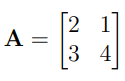

</center>

In [10]:

A = np.array([[2, 1],
              [3, 4]], dtype=float)

In [11]:

char_poly = calculate_characteristic_polynomial_manual(A)
print("Polinomio Característico:", char_poly)

Polinomio Característico: λ**2 - 6.0*λ + 5.0


In [12]:

eigenvalues = find_roots_manual(char_poly)
eigenvalues

[1.0, 5.0]

In [ ]:

eigenvectors = [calculate_eigenvector_manual_1(A, ev) for ev in eigenvalues]


eigenvectors

[[1.00000000000000, -1.00000000000000], [1.00000000000000, 3.00000000000000]]

In [ ]:

eigenvectors = [calculate_eigenvector_numeric(A, ev) for ev in eigenvalues]

# Mostrar resultados
for i, vec in enumerate(eigenvectors):
    print(f"Vector Propio {i+1}: {vec}")

Vector Propio 1: [ 1. -1.]
Vector Propio 2: [1. 3.]


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<center>

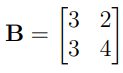

</center>

In [13]:

B = np.array([[3, 2], [3, 4]], dtype=float)

In [14]:

char_poly = calculate_characteristic_polynomial_manual(B)
print("Polinomio Característico:", char_poly)

Polinomio Característico: λ**2 - 7.0*λ + 6.0


In [15]:

eigenvalues = find_roots_manual(char_poly)
eigenvalues

[1.0, 6.0]

In [ ]:

eigenvectors = [calculate_eigenvector_manual_1(B, ev) for ev in eigenvalues]
eigenvectors

[[1.00000000000000, -1.00000000000000], [1.00000000000000, 1.50000000000000]]

In [ ]:

eigenvectors = [calculate_eigenvector_numeric(B, ev) for ev in eigenvalues]

# Mostrar resultados
for i, vec in enumerate(eigenvectors):
    print(f"Vector Propio {i+1}: {vec}")

Vector Propio 1: [ 1. -1.]
Vector Propio 2: [1.  1.5]


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<center>

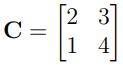

</center>

In [16]:

C = np.array([[2, 3], [1, 4]], dtype=float)

In [17]:

char_poly = calculate_characteristic_polynomial_manual(C)
print("Polinomio Característico:", char_poly)

Polinomio Característico: λ**2 - 6.0*λ + 5.0


In [ ]:

eigenvalues = find_roots_manual(char_poly)
eigenvalues

[1.0, 5.0]

In [ ]:

eigenvectors = [calculate_eigenvector_manual_1(C, ev) for ev in eigenvalues]
eigenvectors

[[1.00000000000000, -0.333333333333333], [1.00000000000000, 1.00000000000000]]

In [ ]:

eigenvectors = [calculate_eigenvector_numeric(C, ev) for ev in eigenvalues]

# Mostrar resultados
for i, vec in enumerate(eigenvectors):
    print(f"Vector Propio {i+1}: {vec}")

Vector Propio 1: [ 1.         -0.33333333]
Vector Propio 2: [1. 1.]


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<center>


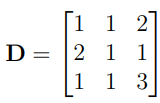


</center>

In [ ]:

D = np.array([[1, 1, 2], [2, 1, 1], [1, 1, 3]], dtype=float)

In [ ]:

char_poly = calculate_characteristic_polynomial_manual(D)
print("Polinomio Característico:", char_poly)

Polinomio Característico: -λ**3 + 5.0*λ**2 - 2.0*λ - 1.0


In [ ]:

eigenvalues = find_roots_manual(char_poly)
eigenvalues

[(-0.28514248182978535+1.3552527156068805e-20j),
 (0.778123837736809-5.293955920339377e-23j),
 (4.507018644092977-8.470329472543003e-22j)]

In [ ]:

eigenvectors = [calculate_eigenvector_numeric(D, ev) for ev in eigenvalues]

# Mostrar resultados
for i, vec in enumerate(eigenvectors):
    print(f"Vector Propio {i+1}: {vec}")

Vector Propio 1: [ 1.        +0.00000000e+00j -1.72889481+2.09042856e-20j
  0.22187616-9.55535085e-21j]
Vector Propio 2: [ 1.        -0.00000000e+00j  6.79216113-1.23645637e-21j
 -3.50701864+5.58276553e-22j]
Vector Propio 3: [1.        +0.00000000e+00j 0.93673368-3.80020323e-23j
 1.28514248+1.00740312e-22j]


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<center>

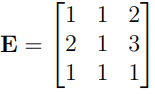

</center>

In [ ]:

E = np.array([[1, 1, 2], [2, 1, 3], [1, 1, 1]], dtype=float)

In [ ]:

char_poly = calculate_characteristic_polynomial_manual(E)
print("Polinomio Característico:", char_poly)

Polinomio Característico: -λ**3 + 3.0*λ**2 + 4.0*λ + 1.0


In [ ]:

eigenvalues = find_roots_manual(char_poly)
eigenvalues

[(-0.6920214716300959+5.293955920339377e-23j),
 (-0.35689586789220945+1.3552527156068805e-20j),
 (4.048917339522306-4.235164736271502e-22j)]

In [ ]:

eigenvectors = [calculate_eigenvector_numeric(E, complex(ev)) for ev in eigenvalues]

# Mostrar resultados
for i, vec in enumerate(eigenvectors):
    print(f"Vector Propio {i+1}: {vec}")

Vector Propio 1: [ 1.        +0.00000000e+00j  2.80193774+5.02560001e-22j
 -2.2469796 -2.99824403e-22j]
Vector Propio 2: [ 1.        +0.00000000e+00j -0.2469796 +1.56828797e-20j
 -0.55495813-8.31093909e-21j]
Vector Propio 3: [1.        +0.00000000e+00j 1.44504187-5.26708793e-23j
 0.80193774+4.98073560e-23j]


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<center>

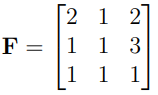


</center>

In [ ]:

F = np.array([[2, 1, 2], [1, 1, 3], [1, 1, 1]], dtype=float)

In [ ]:

char_poly = calculate_characteristic_polynomial_manual(F)
print("Polinomio Característico:", char_poly)

Polinomio Característico: -λ**3 + 4.0*λ**2 + 1.0*λ - 2.0


In [ ]:

eigenvalues = find_roots_manual(char_poly)
eigenvalues

[(-0.7615571818318906-1.0587911840678754e-22j),
 (0.6366717620673165+2.117582368135751e-22j),
 (4.124885419764574-1.6940658945086007e-21j)]

In [ ]:

eigenvectors = [calculate_eigenvector_numeric(F, complex(ev)) for ev in eigenvalues]

# Mostrar resultados
for i, vec in enumerate(eigenvectors):
    print(f"Vector Propio {i+1}: {vec}")

Vector Propio 1: [ 1.        +0.00000000e+00j 12.01395332+3.57651825e-21j
 -7.38775525-1.84461995e-21j]
Vector Propio 2: [ 1.        -0.00000000e+00j -0.91934399-1.14977739e-22j
 -0.22199212+4.37597380e-23j]
Vector Propio 3: [1.        +0.00000000e+00j 0.90539067+1.88150616e-23j
 0.60974737+2.17843979e-22j]


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<center>

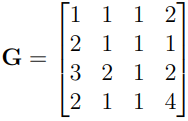

</center>

In [ ]:

G = np.array([[1, 1, 1, 2], [2, 1, 1, 1], [3, 2, 1, 2], [2, 1, 1, 4]], dtype=float)

In [ ]:

char_poly = calculate_characteristic_polynomial_manual(G)
print("Polinomio Característico:", char_poly)

Polinomio Característico: 1.0*λ**4 - 7.0*λ**3 + 1.0*λ**2 + 9.0*λ + 3.0


In [ ]:

eigenvalues = find_roots_manual(char_poly)
eigenvalues

[(-0.7356415384387972+4.467612648532395e-30j),
 (-0.4074562701381242-5.147211431710122e-30j),
 (1.5085633449433247+6.475892277259207e-31j),
 (6.634534463633597+3.2009555451806406e-32j)]

In [ ]:

eigenvectors = [calculate_eigenvector_numeric(G, complex(ev)) for ev in eigenvalues]

# Mostrar resultados
for i, vec in enumerate(eigenvectors):
    print(f"Vector Propio {i+1}: {vec}")

Vector Propio 1: [ 1.        -0.00000000e+00j -0.49071912+3.34345244e-30j
 -1.05165261-2.27720316e-30j -0.09663491-3.65245702e-31j]
Vector Propio 2: [ 1.        -0.00000000e+00j -2.05831238-1.03169458e-29j
  1.14311321+1.51838804e-29j -0.24612855-9.65239059e-31j]
Vector Propio 3: [ 1.        -0.00000000e+00j  5.04659888+4.47522341e-30j
  5.67106596+5.52295767e-30j -5.10455075-4.21569050e-30j]
Vector Propio 4: [1.        -0.00000000e+00j 0.90243261+1.75572270e-33j
 1.43747344+5.24201804e-33j 1.64731421+9.49003965e-34j]


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<center>

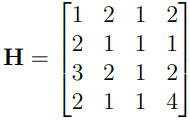

</center>

In [ ]:

H = np.array([[1, 2, 1, 2], [2, 1, 1, 1], [3, 2, 1, 2], [2, 1, 1, 4]], dtype=float)

In [ ]:

char_poly = calculate_characteristic_polynomial_manual(H)
print("Polinomio Característico:", char_poly)

Polinomio Característico: 1.0*λ**4 - 7.0*λ**3 - 1.0*λ**2 + 14.0*λ + 6.0


In [ ]:

eigenvalues = find_roots_manual(char_poly)
eigenvalues

[(-1.087934923662562+8.922433312368532e-30j),
 (-0.46744323473112087-1.1419135653533586e-29j),
 (1.7281159082896402+2.4859872019709935e-30j),
 (6.8272622501040425+1.0715139194060878e-32j)]

In [ ]:

eigenvectors = [calculate_eigenvector_numeric(H, complex(ev)) for ev in eigenvalues]

# Mostrar resultados
for i, vec in enumerate(eigenvectors):
    print(f"Vector Propio {i+1}: {vec}")

Vector Propio 1: [ 1.        +0.00000000e+00j -0.49346694-4.84081739e-30j
 -0.83834525+9.40184789e-30j -0.1313279 -9.84855454e-31j]
Vector Propio 2: [ 1.        +0.00000000e+00j  0.79799809+3.54852287e-29j
 -3.27859439-7.39595551e-29j  0.10757748+8.19911345e-30j]
Vector Propio 3: [ 1.        -0.00000000e+00j  1.99218283+8.07875103e-31j
  2.15732978+2.42158913e-30j -2.70678977-1.57562943e-30j]
Vector Propio 4: [1.        -0.00000000e+00j 0.81439712+1.18899555e-34j
 1.29294319+1.30609843e-33j 1.45276241+7.17984127e-35j]


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**